In [1]:
#Importing the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input , Conv2D , Dense , Flatten , Dropout
from tensorflow.keras.models import Model

In [2]:
#Getting the Dataset
fmnist = tf.keras.datasets.fashion_mnist 

#Splitting and Normalising the data
(x_train , y_train) , (x_test , y_test) = fmnist.load_data()
x_train , x_test = x_train/255.0 ,  x_test/255.0
print(x_train.shape)
print(y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


In [3]:
#Fashion MNIST data is gryscale image - it is 2D
#Convolution expects height X width X color , therefore we need to add an additional dim
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test ,-1)
print(x_train.shape)


(60000, 28, 28, 1)


In [4]:
#Computing number of classes
K = len(set(y_train))

In [5]:
#Biulding the model with Keras functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),strides = 2,activation ='relu')(i)
x = Conv2D(64,(3,3),strides = 2,activation ='relu')(x)
x = Conv2D(128,(3,3),strides = 2,activation ='relu')(x)
x = Flatten() (x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K , activation='softmax')(x)

model = Model(i,x)


#Dropout layers are added fror regularisation

In [6]:
x_test.shape

(10000, 28, 28, 1)

In [7]:
#Compile annd fitting

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train,y_train,validation_data = (x_test,y_test) , epochs=15)

Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5090 - accuracy: 0.8121 - val_loss: 0.3993 - val_accuracy: 0.8514
Epoch 2/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3545 - accuracy: 0.8671 - val_loss: 0.3346 - val_accuracy: 0.8755
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3066 - accuracy: 0.8843 - val_loss: 0.3278 - val_accuracy: 0.8789
Epoch 4/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2732 - accuracy: 0.8972 - val_loss: 0.3178 - val_accuracy: 0.8884
Epoch 5/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2489 - accuracy: 0.9063 - val_loss: 0.2943 - val_accuracy: 0.8927
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2268 - accuracy: 0.9143 - val_loss: 0.2936 - val_accuracy: 0.8922
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2076 - accuracy: 0.9218 - val_loss: 0.2952 -

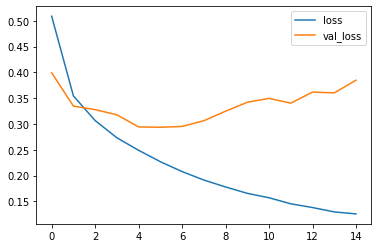

In [8]:
#Plotting Loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

It appears that the model iss overfitting to the training set since the validation loss is going up slightly


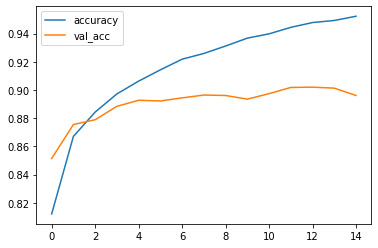

In [9]:
#Plotting accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

Here Valiidation accuracy stays pretty steady compared to the Validation loss simultaneously going up(previous plot)

It would mean that the model is becoming more and more cnfident in its incorrect predictions.

As te predictions become more and more , incorrect list gets bigger and bigger .

And the prediction becoming more incorrect when it was already incorrect wouldn't affect the accuracy

[[885   0  24  18   5   2  59   0   7   0]
 [  3 976   1  11   3   0   4   0   2   0]
 [ 16   1 851   9  49   0  71   0   3   0]
 [ 16   6  25 890  35   1  25   0   1   1]
 [  2   0  74  18 851   0  54   0   1   0]
 [  0   0   0   0   0 966   0  22   0  12]
 [148   0  82  25 100   1 632   0  12   0]
 [  0   0   0   0   0   9   0 968   0  23]
 [  3   1   4   2   3   1   5   1 979   1]
 [  0   0   0   0   0   4   2  31   0 963]]


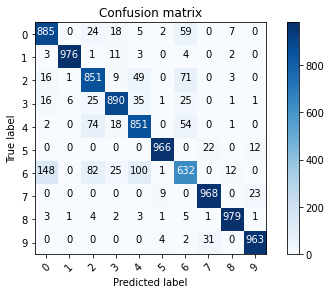

In [10]:
#Plotiing the Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues) :
         print(cm)
         plt.imshow(cm,interpolation='nearest',cmap=cmap)
         plt.title(title)
         plt.colorbar()
         tick_marks = np.arange(len(classes))
         plt.xticks(tick_marks,classes,rotation = 45)
         plt.yticks(tick_marks,classes)

         fmt = 'd'
         thresh = cm.max() / 2.
         for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])) :
              plt.text(j,i,format(cm[i,j],fmt),
                       horizontalalignment="center",
                        color="white" if cm[i,j] > thresh else "black")
         
         plt.tight_layout()
         plt.ylabel('True label')
         plt.xlabel('Predicted label')
         plt.show()
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test , p_test)
plot_confusion_matrix(cm,list(range(10)))

In [11]:
labels = '''T-Shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

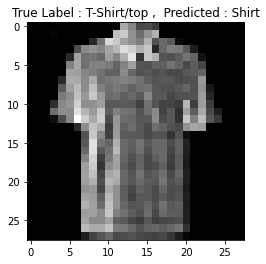

In [12]:
#Showing some misclassified samples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28) , cmap='gray')
plt.title("True Label : %s ,  Predicted : %s" % (labels[y_test[i]], labels[p_test[i]]));